In [ ]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
import numpy as np
import xgboost as xgb

# 讀取資料

In [ ]:
#load data from sklearn datasets
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target
print(boston.keys())
X, boston.feature_names

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#整理成dataframe數據集
df = pd.DataFrame(X,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT'])
df['MEDVprice'] = pd.DataFrame(y,columns=['MEDVprice'])
X = df.iloc[:,0:13]
y = df.iloc[:,-1]
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVprice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 100
number of training samples: 406


In [ ]:
X_train.shape

(406, 13)

In [ ]:
X_train.isnull( ).sum( )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
#創建線性回歸
lm = LinearRegression()
lm.fit(X_train, y_train) # use all features and train data to create model
print(lm.intercept_,lm.coef_)
r2_train= lm.score(X_train, y_train)
r2_test= lm.score(X_test, y_test)
print(r2_train, r2_test)

42.28626298344901 [-1.11032620e-01  5.79772626e-02  1.68950489e-02  2.13839616e+00
 -1.92748521e+01  3.11124463e+00  5.50103108e-03 -1.48228753e+00
  3.01624408e-01 -1.11359165e-02 -9.88363922e-01  7.97485768e-03
 -5.42907603e-01]
0.7293635681762962 0.765242610275058


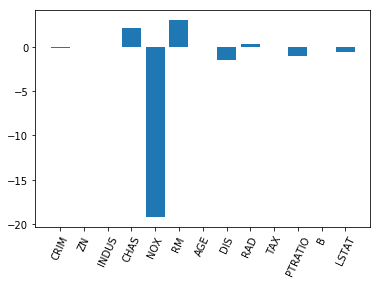

In [ ]:
# 畫圖 從高到低 去畫出 特徵重要性
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(feature_names , lm.coef_)
plt.xticks(rotation=65)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LinearRegression()).fit(X_train, y_train)
import numpy as np
#修改資料呈現方式
np.set_printoptions(suppress=True)
selector.estimator_.coef_

array([ -0.11103262,   0.05797726,   0.01689505,   2.13839616,
       -19.27485205,   3.11124463,   0.00550103,  -1.48228753,
         0.30162441,  -0.01113592,  -0.98836392,   0.00797486,
        -0.5429076 ])

In [ ]:
lm.fit(selector.transform(X_train), y_train) # use selected features and train data to create model
r2_train= lm.score(selector.transform(X_train), y_train)
r2_test= lm.score(selector.transform(X_test), y_test)
print(r2_train, r2_test)    
#     r2_adj = 1 - ((1 - r2) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p-1)) )

0.513678159069731 0.6016329180434614


# 標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
selector = SelectFromModel(estimator=LinearRegression()).fit(X_std, y_train)

In [ ]:
selector.estimator_.coef_

array([-1.01350474,  1.34600685,  0.11557489,  0.57619956, -2.25207327,
        2.13772192,  0.15680574, -3.13809674,  2.62646459, -1.88649713,
       -2.13976217,  0.73920792, -3.90753383])

In [ ]:
selector.threshold_

1.695034565536545

In [ ]:
selector.get_support(), boston.feature_names

(array([False, False, False, False,  True,  True, False,  True,  True,
         True,  True, False,  True]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [ ]:
boston.feature_names[selector.get_support()]

array(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [ ]:
selector.transform(X_train).shape

(406, 7)

In [ ]:
selector.transform(X_train)

array([[  0.584 ,   5.837 ,   1.9976, ..., 666.    ,  20.2   ,  15.69  ],
       [  0.74  ,   6.485 ,   1.9784, ..., 666.    ,  20.2   ,  18.85  ],
       [  0.448 ,   6.169 ,   5.7209, ..., 233.    ,  17.9   ,   5.81  ],
       ...,
       [  0.693 ,   6.405 ,   1.6768, ..., 666.    ,  20.2   ,  19.37  ],
       [  0.507 ,   6.086 ,   3.6519, ..., 307.    ,  17.4   ,  10.88  ],
       [  0.499 ,   5.85  ,   3.9342, ..., 279.    ,  19.2   ,   8.77  ]])

In [ ]:
#整理成dataframe數據集
df = pd.DataFrame(X,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT'])
df['MEDVprice'] = pd.DataFrame(y,columns=['MEDVprice'])

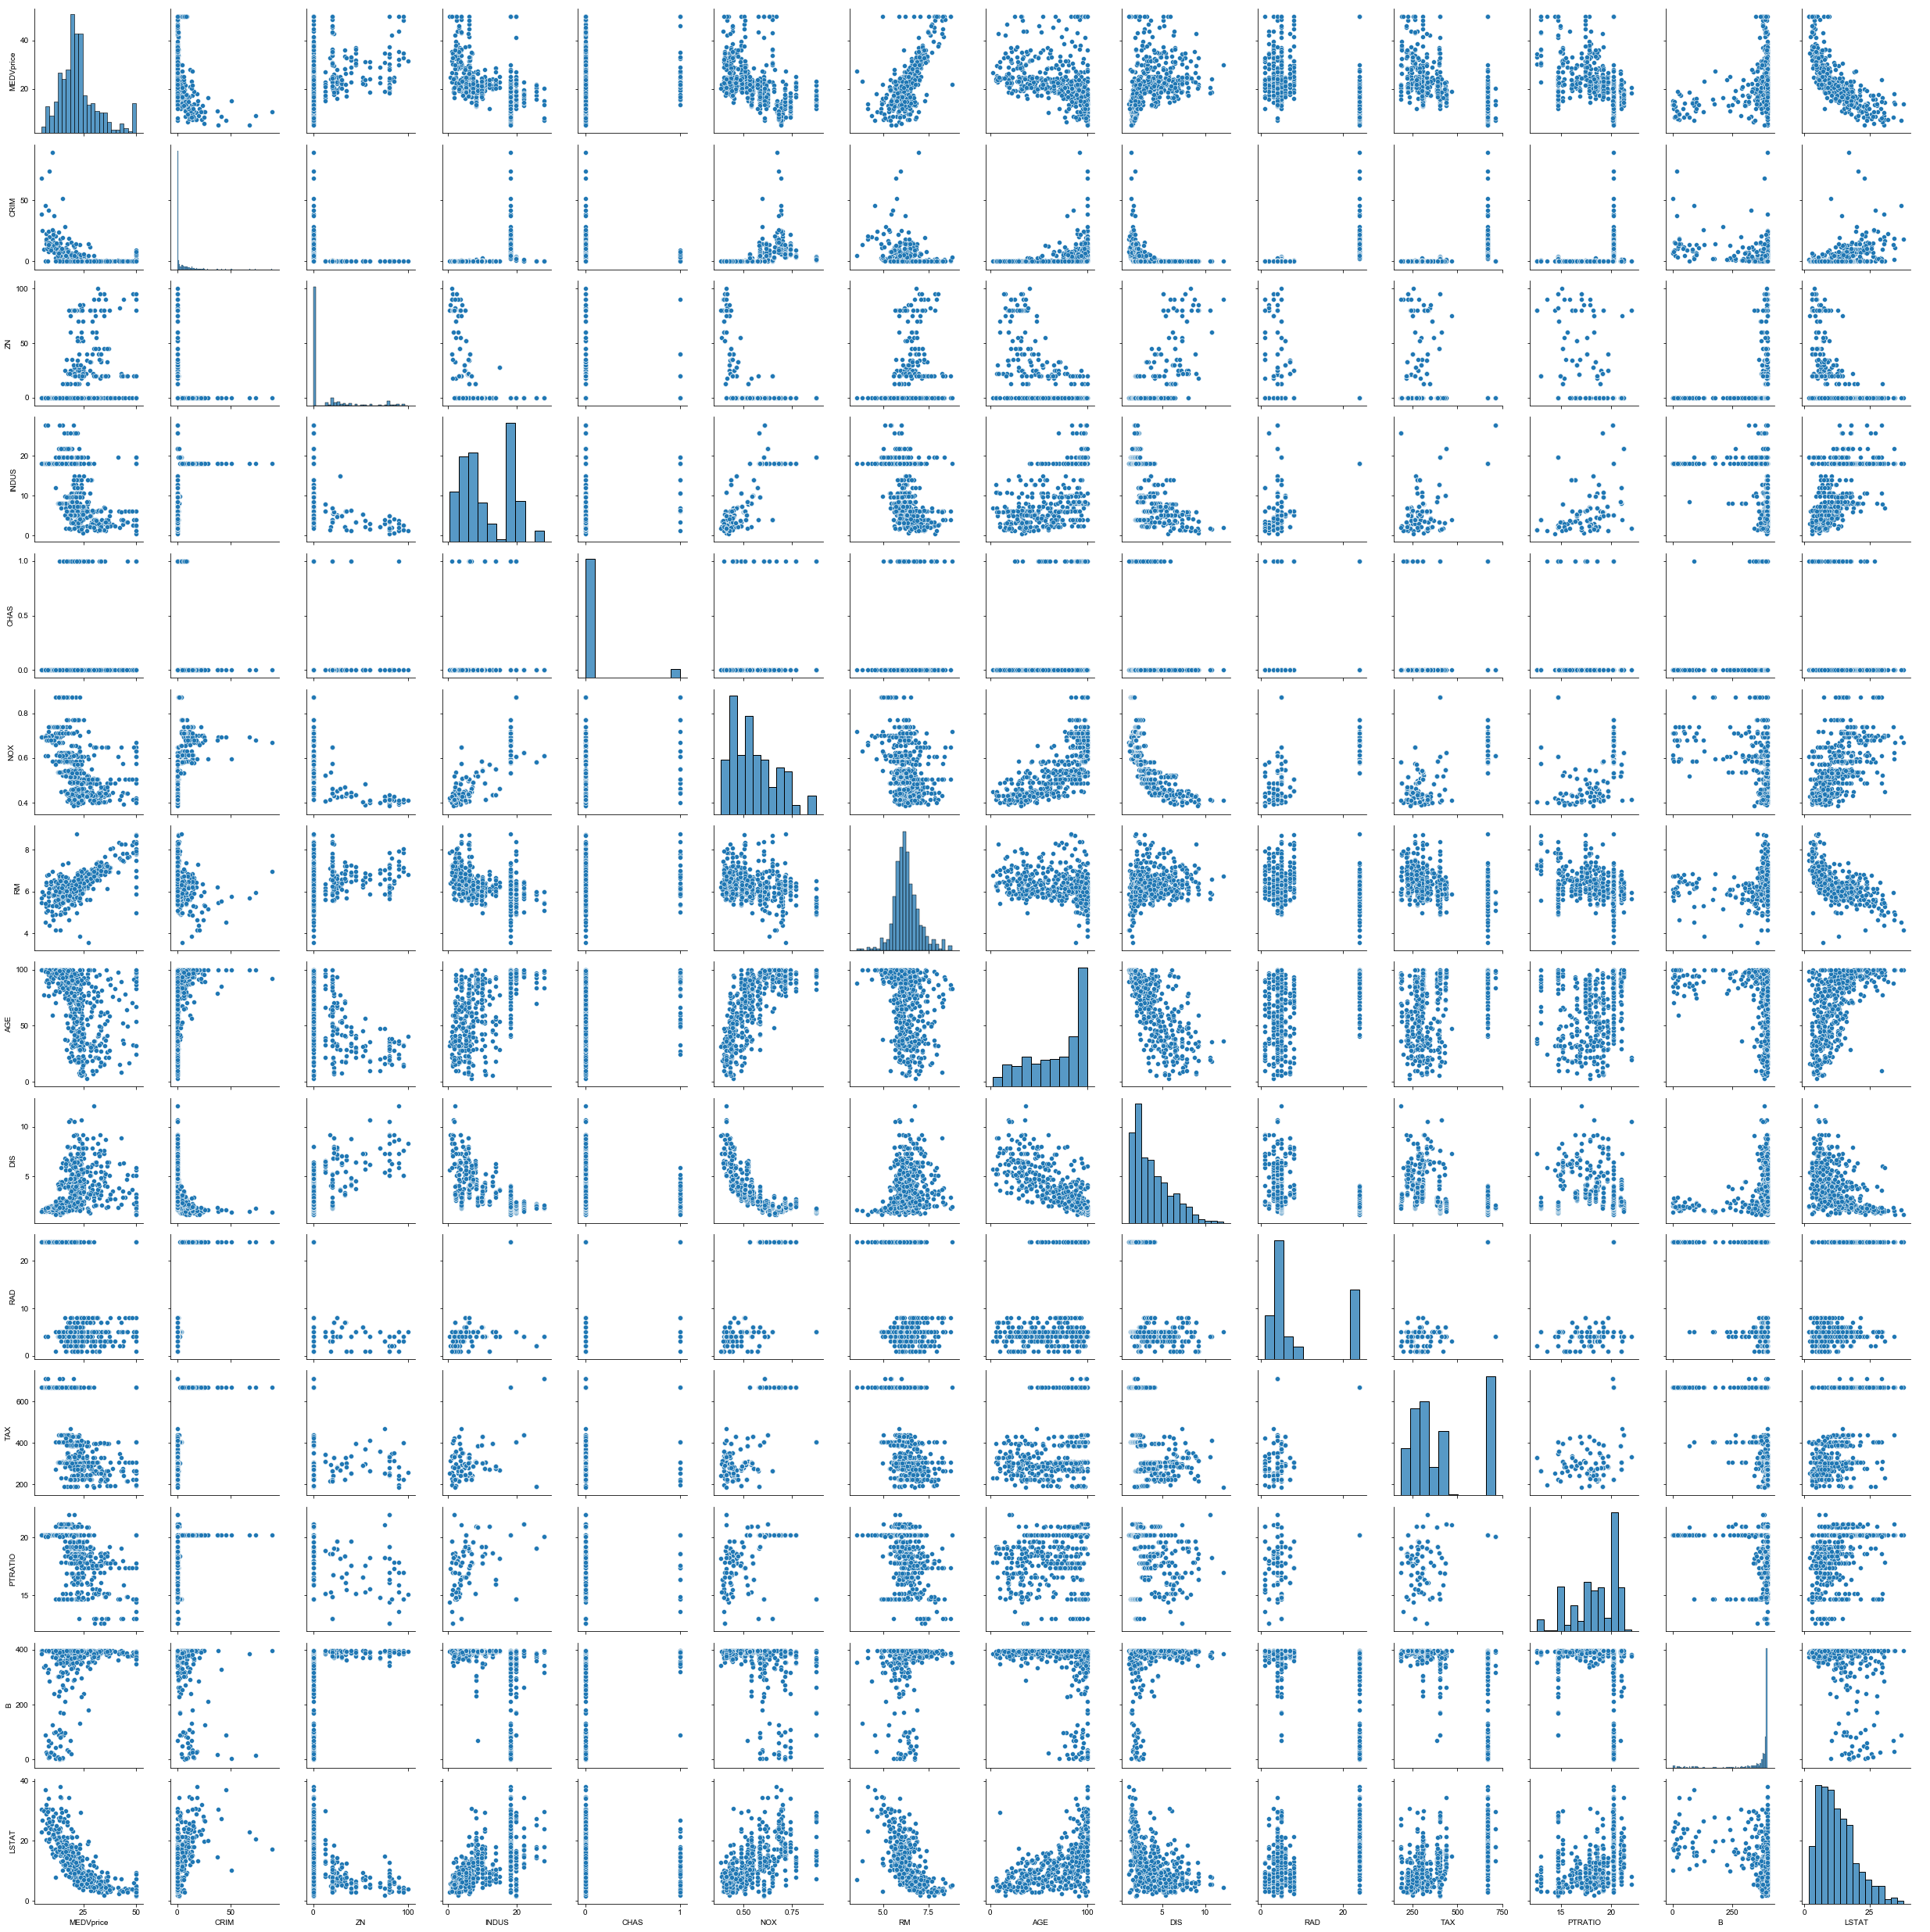

In [ ]:
cols = ['MEDVprice','CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT']
sns.pairplot(df[cols])
sns.set(font_scale =1.5)

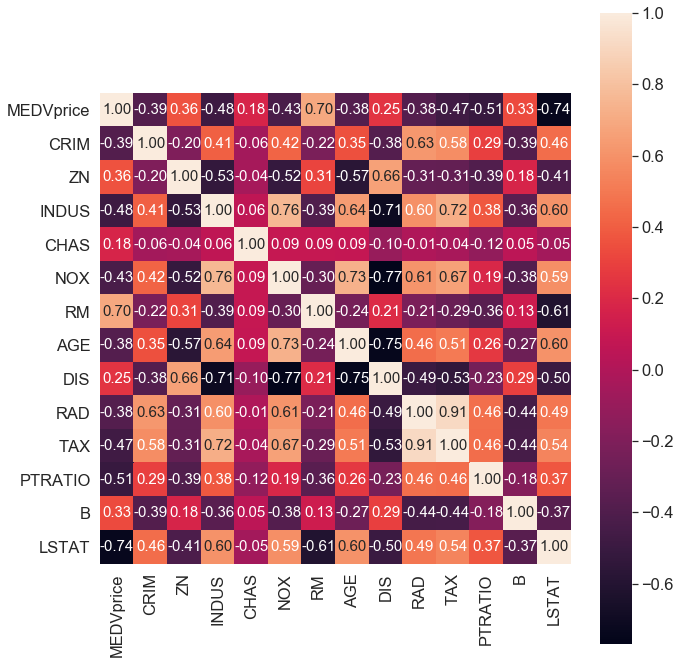

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,10))

cm = np.corrcoef(df[cols].values.T) # Corr Matrix
sns.set(font_scale=1.5)
hm = sns.heatmap(cm
                 ,cbar=True
                 ,annot=True
                 ,square=True
                 ,fmt='.2f'
                 ,annot_kws={'size': 15}
                 ,yticklabels=cols
                 ,xticklabels=cols)

plt.tight_layout()
# plt.savefig('heatmap.jpg') # 必須要放在 plt.show() 之前
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
#創建線性回歸
lm = LinearRegression()
lm.fit(X_train, y_train) # use all features and train data to create model
print(lm.intercept_,lm.coef_)
r2_train= lm.score(X_train, y_train)
r2_test= lm.score(X_test, y_test)
print(r2_train, r2_test)

42.28626298344901 [ -0.11103262   0.05797726   0.01689505   2.13839616 -19.27485205
   3.11124463   0.00550103  -1.48228753   0.30162441  -0.01113592
  -0.98836392   0.00797486  -0.5429076 ]
0.7293635681762962 0.765242610275058


22.47438423645322 [-1.01350474  1.34600685  0.11557489  0.57619956 -2.25207327  2.13772192
  0.15680574 -3.13809674  2.62646459 -1.88649713 -2.13976217  0.73920792
 -3.90753383]


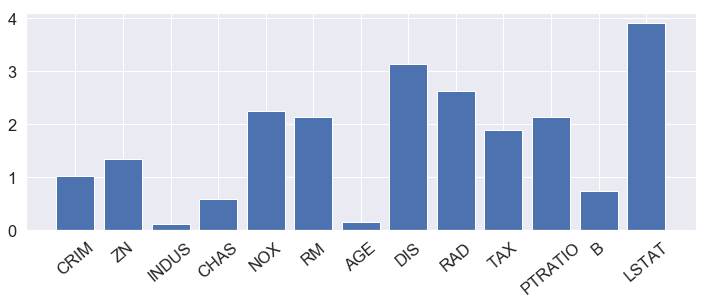

In [ ]:
#創建線性回歸
lm = LinearRegression()
lm.fit(X_std, y_train)
print(lm.intercept_ , lm.coef_)
# 畫圖 特徵重要性

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.bar(feature_names , abs(lm.coef_))
plt.xticks(rotation=40)
plt.show()

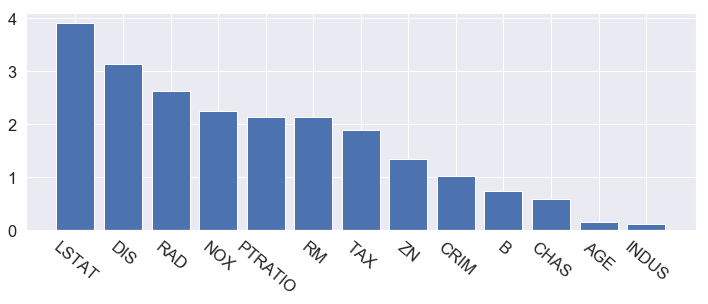

,score,feature
12,3.907534,LSTAT
7,3.138097,DIS
8,2.626465,RAD
4,2.252073,NOX
10,2.139762,PTRATIO
5,2.137722,RM
9,1.886497,TAX
1,1.346007,ZN
0,1.013505,CRIM
11,0.739208,B


In [ ]:
# 畫圖 從高到低 去畫出 特徵重要性
# 使用table 方式進行排序
plt.figure(figsize=(12, 4))
feature_sort = pd.DataFrame( abs(lm.coef_), columns=['score'])
feature_sort['feature'] = feature_names
feature_sort = feature_sort.sort_values(by='score', ascending=False)
# 使用table 方式進行排序
plt.bar(feature_sort['feature'] , feature_sort['score'])
plt.xticks(rotation=-40)
plt.show()
feature_sort

In [ ]:
p=7
lm.fit(selector.transform(X_train), y_train) # use train data to create model
r2_train= lm.score(selector.transform(X_train), y_train)
r2_test= lm.score(selector.transform(X_test), y_test)
r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p-1)) )
print(r2_train, r2_test, r2_adj)  

0.703109162977364 0.7464748757092428 0.7271849206001635


In [ ]:
lm.intercept_ , lm.coef_

(45.64257657158757,
 array([-18.0086473 ,   3.38104635,  -1.08639755,   0.19455093,
         -0.00887728,  -1.13665962,  -0.58922586]))

# K-Fold


In [ ]:
# k-fold CV (using selected 7 variables)
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

scores = cross_val_score(lm, selector.transform(X_train), y_train, scoring='r2', cv=5)
scores

array([0.74774285, 0.66866317, 0.66579656, 0.63196233, 0.71394953])

In [ ]:
# the other way of doing the same thing (more explicit)
from sklearn.model_selection import KFold
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores, scores.mean()  

(array([0.685874  , 0.73705663, 0.52507792, 0.80110411, 0.71132109]),
 0.6920867514736038)

# Final multi-linear regression model


In [ ]:
# final muti-linear regression model
new_X_train = X_train[['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']] 
new_X_test = X_test[['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
lm = LinearRegression()

# fit the model 
lm.fit(new_X_train, y_train) #建立 model
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)

# Find the R^2
r2_train = lm.score(new_X_train, y_train)
r2_test = lm.score(new_X_test, y_test)
print('The R-square for train is: ', r2_train )
print('The R-square for test is: ', r2_test )

r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - 7-1)) )
print('The Adjusted R^2 for test is: ' + str(r2_adj))

#預測
Y_hat = lm.predict(new_X_test) 
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, Y_hat))

intercept = 45.64257657158743
Coef = [-18.0086473    3.38104635  -1.08639755   0.19455093  -0.00887728
  -1.13665962  -0.58922586]
The R-square for train is:  0.703109162977364
The R-square for test is:  0.7464748757092432
The Adjusted R^2 for test is: 0.7271849206001639
The mean square error of price and predicted value using multifit is:  25.027924212446226


# 可視化

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDVprice'],
      dtype='object')

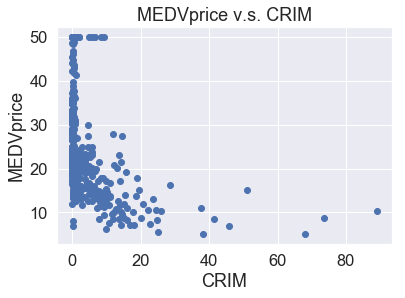

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["CRIM"],df["MEDVprice"])
plt.xlabel("CRIM")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. CRIM")
#plt.grid()
plt.show()

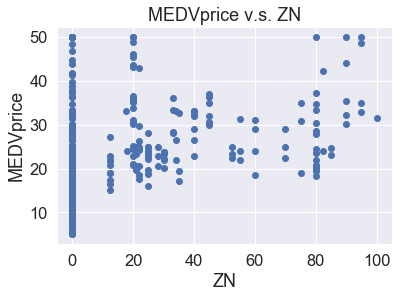

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["ZN"],df["MEDVprice"])
plt.xlabel("ZN")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. ZN")
#plt.grid()
plt.show()

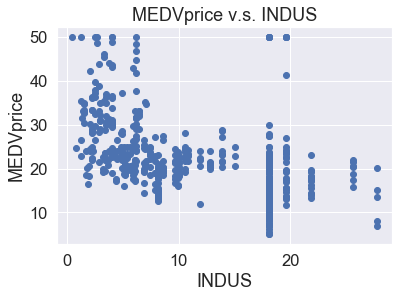

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["INDUS"],df["MEDVprice"])
plt.xlabel("INDUS")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. INDUS")
#plt.grid()
plt.show()

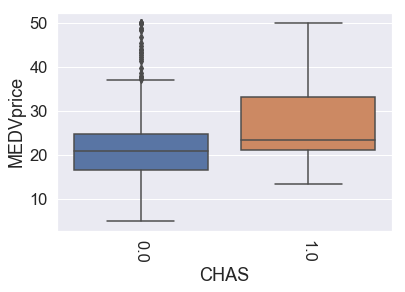

In [ ]:
#填入自己做的數據探索 和 可視化
# CHAS v.s. MEDVprice
# plt.figure(figsize =(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='CHAS', y ='MEDVprice',data=df )

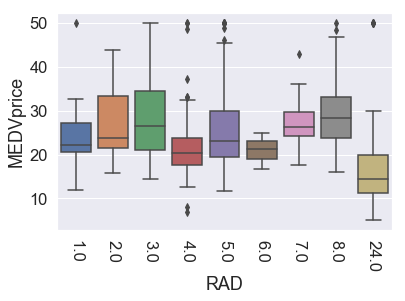

In [ ]:
#填入自己做的數據探索 和 可視化
# RAD v.s. MEDVprice
# plt.figure(figsize =(16,5))
plt.xticks(rotation = -90)
sns.boxplot(x='RAD', y ='MEDVprice',data=df )

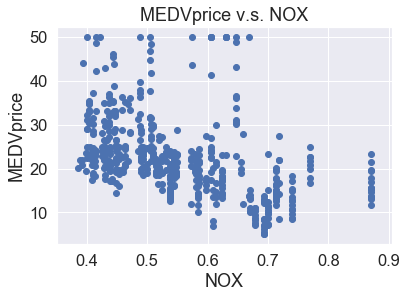

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["NOX"],df["MEDVprice"])
plt.xlabel("NOX")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. NOX")
#plt.grid()
plt.show()

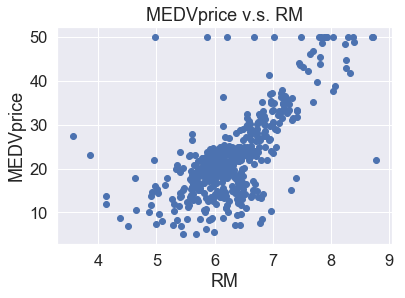

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["RM"],df["MEDVprice"])
plt.xlabel("RM")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. RM")
#plt.grid()
plt.show()

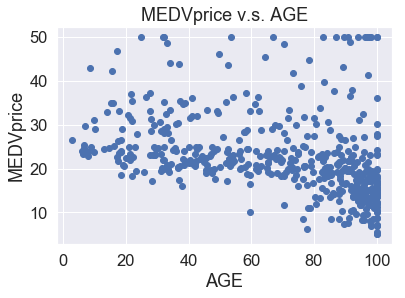

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["AGE"],df["MEDVprice"])
plt.xlabel("AGE")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. AGE")
#plt.grid()
plt.show()

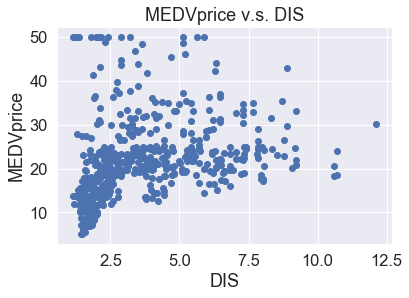

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["DIS"],df["MEDVprice"])
plt.xlabel("DIS")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. DIS")
#plt.grid()
plt.show()

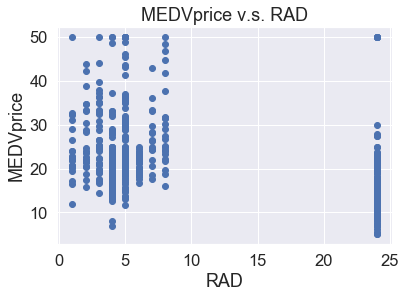

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["RAD"],df["MEDVprice"])
plt.xlabel("RAD")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. RAD")
#plt.grid()
plt.show()

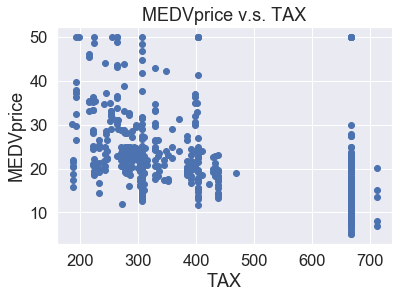

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["TAX"],df["MEDVprice"])
plt.xlabel("TAX")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. TAX")
#plt.grid()
plt.show()

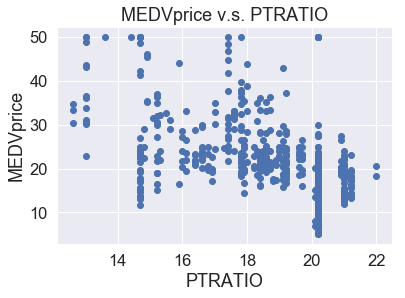

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["PTRATIO"],df["MEDVprice"])
plt.xlabel("PTRATIO")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. PTRATIO")
#plt.grid()
plt.show()

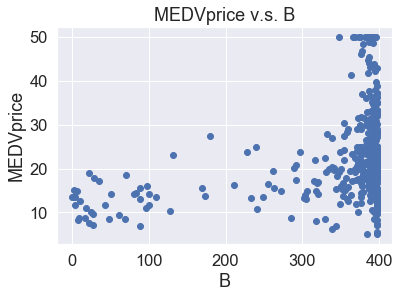

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["B"],df["MEDVprice"])
plt.xlabel("B")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. B")
#plt.grid()
plt.show()

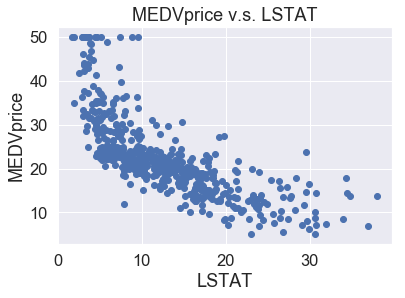

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["LSTAT"],df["MEDVprice"])
plt.xlabel("LSTAT")
plt.ylabel("MEDVprice") 
plt.title("MEDVprice v.s. LSTAT")
#plt.grid()
plt.show()

# 決策樹Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X2 = df[['LSTAT']].values
y2 = df['MEDVprice'].values

# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.197, random_state=1)

tree = DecisionTreeRegressor(max_depth=3)# 改變最多分枝 max_depth=1,2,3,4
tree.fit(X_train2, y_train2)
predict = tree.predict(X_train2)
# DecisionTreeRegressor?

In [ ]:
# 使用table 方式進行排序
df_sort = pd.DataFrame(X_train2, columns=['LSTAT'])
df_sort['MEDVprice'] = y_train2
df_sort['predict'] = predict
df_sort = df_sort.sort_values(by='LSTAT', ascending= True)

df_sort

,LSTAT,MEDVprice,predict
78,1.73,50.0,41.311538
18,1.98,34.9,41.311538
15,2.87,36.4,41.311538
347,2.94,33.4,41.311538
325,2.97,50.0,41.311538
152,2.98,32.0,41.311538
330,3.01,46.0,41.311538
267,3.11,42.3,41.311538
137,3.11,44.0,41.311538
332,3.13,37.6,41.311538


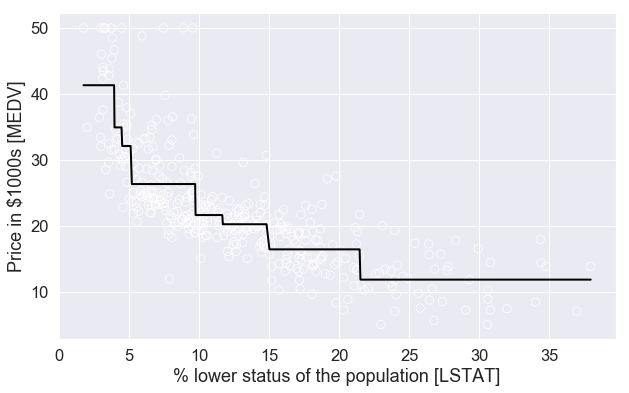

0.6957243830702355
0.6890082346491582
MSE train: 24.60983707575624


In [ ]:
#散布圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sort, x="LSTAT", y="MEDVprice", s=70, color='steelblue',edgecolor='white')
sns.lineplot(x='LSTAT', y='predict', data=df_sort , color='black', lw=2) 
# plt.scatter(X_test, y_test, c='g', edgecolor='white', s=70)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

print(tree.score(X_train2, y_train2))

print(tree.score(X_test2, y_test2))

from sklearn.metrics import mean_squared_error
print('MSE train:' , mean_squared_error(y_train2, tree.predict(X_train2)))
# print('MSE test:' , mean_squared_error(y_test, tree.predict(X_test)))

# 殘差圖Random forest regression

In [ ]:
# 重設 X 包含所有特徵欄位

X = df.iloc[:, :-1].values
y = df['MEDVprice'].values

# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)


forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
# RandomForestRegressor?

MSE train: 1.401, test: 8.607
R^2 train: 0.983, test: 0.913


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_train_pred,  
#             y_train_pred - y_train, 
#             c='steelblue',
#             edgecolor='white',
#             marker='o', 
#             s=70,
#             alpha=0.9,
#             label='training data')
# plt.scatter(y_test_pred,  
#             y_test_pred - y_test, 
#             c='limegreen',
#             edgecolor='white',
#             marker='s', 
#             s=70,
#             alpha=0.9,
#             label='test data')

# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.legend(loc='upper left')
# plt.axhline(y=0, lw=2, color='black')
# plt.tight_layout()

# # plt.savefig('images/10_14.png', dpi=300)
# plt.show()

Feature: 0, Score: 0.04655
Feature: 1, Score: 0.00137
Feature: 2, Score: 0.00842
Feature: 3, Score: 0.00088
Feature: 4, Score: 0.02418
Feature: 5, Score: 0.28313
Feature: 6, Score: 0.01865
Feature: 7, Score: 0.06068
Feature: 8, Score: 0.00444
Feature: 9, Score: 0.01349
Feature: 10, Score: 0.01956
Feature: 11, Score: 0.01303
Feature: 12, Score: 0.50563


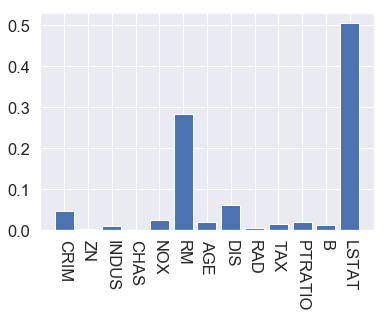

In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
cls=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT']
plt.bar(cls, importance)
plt.xticks(rotation=-90)
plt.show()

# create XGB model

In [ ]:
traindata= pd.read_csv('Boston_train.csv', encoding='utf-8-sig', index_col=0)
# reading test data
testdata= pd.read_csv('Boston_test.csv', encoding='utf-8-sig', index_col=0)
# testdata.dtypes

X = traindata.iloc[:, :-1]
y = traindata.MEDVprice

#分拆數據集
from sklearn.model_selection import train_test_split
X_train3, X_valid3, y_train3, y_valid3 = train_test_split( X, y, test_size=0.2, random_state=42 )

In [ ]:
# create XGB model for train data
xgb_mod= xgb.XGBRegressor(objective="reg:squarederror",
                              n_estimators=100, colsample_bytree=0.5, 
                              max_depth=2) 
xgb_mod.fit(X_train3, y_train3)# 創建xgb模型


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [ ]:
# prediction for train data
y_hat_train = xgb_mod.predict(X_train3) 

In [ ]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = 1 - ((1 - r2) * ((y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters -1)) )
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

# prediction for valid data
y_hat = xgb_mod.predict(X_valid3) 
print_metrics(y_valid3, y_hat, 12)   

Mean Square Error      = 1.4108700132548766
Root Mean Square Error = 1.1878004938771816
Mean Absolute Error    = 0.8647940682201849
Median Absolute Error  = 0.6576441764831547
R^2                    = 0.9794469184338032
Adjusted R^2           = 0.9758724694657689


In [ ]:
# 對500筆test data進行預測
import numpy as np
y_hat_test = xgb_mod.predict(testdata.iloc[:, :-1])
AW_answer = pd.read_csv('Boston_test.csv')
AW_answer['y_hat_test'] = y_hat_test

# #AW_answer
AW_answer

,Unnamed: 0,MEDVprice,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_hat_test
0,0,28.2,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53,30.240660
1,1,23.9,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,24.838207
2,2,16.6,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,18.287056
3,3,22.0,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10,21.392822
4,4,20.8,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,19.048323
5,5,23.0,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12,21.884630
6,6,27.9,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,28.095663
7,7,14.5,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.415815
8,8,21.5,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,276.0,16.4,396.90,17.92,20.542425
9,9,22.6,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.840446


In [ ]:
# Mean Square Error & R2 for 500筆
print_metrics(AW_answer.MEDVprice, y_hat_test, 12)

Mean Square Error      = 1.3444889189018034
Root Mean Square Error = 1.1595209868311154
Mean Absolute Error    = 0.8063692665100097
Median Absolute Error  = 0.5593993186950685
R^2                    = 0.9863807434696236
Adjusted R^2           = 0.9845022253275026


# 標準化殘差散佈圖

In [ ]:
residual = y_hat_train - y_train3
residual.mean(),residual.std()
std_res = (residual - residual.mean())/residual.std()
new_res = AW_answer.MEDVprice - y_hat_test
new_std_res = (new_res- residual.mean())/residual.std()

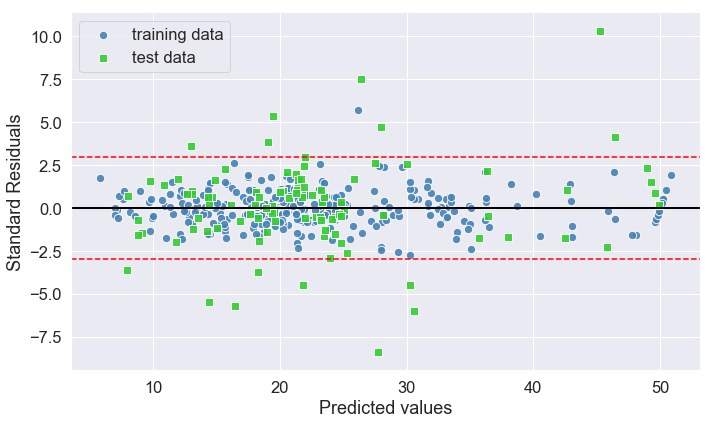

In [ ]:
# 標準化殘差散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(y_hat_train,  
            std_res, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')
plt.scatter(y_hat_test,  
            new_std_res, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')

plt.axhline(0, color='red')
plt.axhline(3, color='red', linestyle='dashed')
plt.axhline(-3, color='red', linestyle='dashed')
plt.xlabel('Predicted values')
plt.ylabel('Standard Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

# XGBoost model

In [ ]:
##(殘差圖)
# import xgboost as xgb
# import pandas as pd
# import numpy as np
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective = "reg:squarederror"
                          ,n_estimators=10
                          , seed = 123 
                          , booster="gbtree"
#                           , max_depth =6
                         )

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
y_train_pred = xg_reg.predict(X_train)
y_test_pred = xg_reg.predict(X_test)

# Compute the mse & R2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print(xg_reg)

# DMatrixes

In [ ]:
## 重設 X 包含所有特徵欄位
##(殘差圖)
# X = df.iloc[:, :-1]
# y = df['MEDVprice']

# # 分出訓練 跟 驗證
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)

# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)
# DM_train?

# Create the parameter dictionary: params
params = {"booster":"gbtree", "objective" : "reg:squarederror","max_depth":4} # regression 用 reg:squarederror

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5) # 原本 n_estimators = 10

# Predict the labels of the test set: preds
y_train_pred = xg_reg.predict(DM_train)
y_test_pred =  xg_reg.predict(DM_test)
# Compute the mse & R2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


MSE train: 25.208, test: 27.858
R^2 train: 0.688, test: 0.718


# XGBoost cross-validation

In [ ]:
#https://rdrr.io/cran/xgboost/man/xgb.cv.html
# Create the DMatrix: DM_train
DM_train = xgb.DMatrix(data=X_train,label=y_train)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4} # regression 用 reg:squarederror

# Perform cross-validation: cv_results
cv_results =xgb.cv(dtrain = DM_train
                   , params = params
                   , nfold = 5
                   , num_boost_round = 50
                   , metrics='rmse'
                   , as_pandas=True
                   , shuffle=True,seed=123) # num_boost_round best test at 33

# Print cv_results
print(cv_results)

# Extract and print final boosting round MSE (rmse^2)
print('Final MSE test:', (np.square((cv_results["test-rmse-mean"]).tail(1))))

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         17.046801        0.096223       17.159788       0.473955
1         12.331832        0.068324       12.558894       0.443266
2          9.004968        0.050496        9.387201       0.542747
3          6.677148        0.054352        7.334745       0.633012
4          5.051480        0.038922        5.992695       0.735889
5          3.925740        0.045741        5.185162       0.819386
6          3.166202        0.041303        4.688294       0.906837
7          2.638451        0.049779        4.405766       0.902513
8          2.284351        0.064361        4.229275       0.957267
9          2.045978        0.062345        4.137344       0.998519
10         1.859652        0.059843        4.056482       1.013251
11         1.733284        0.068948        4.008922       0.997367
12         1.634825        0.065845        3.984649       1.000362
13         1.531494        0.073246        3.939119       0.99

# Plot Trees

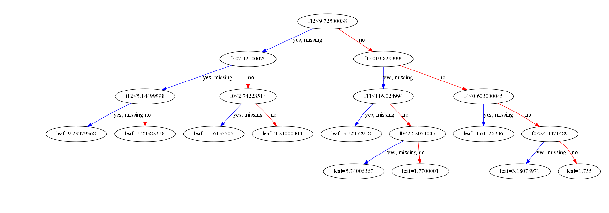

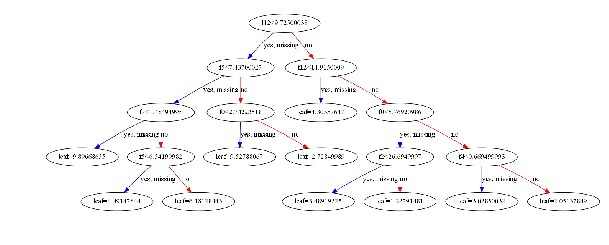

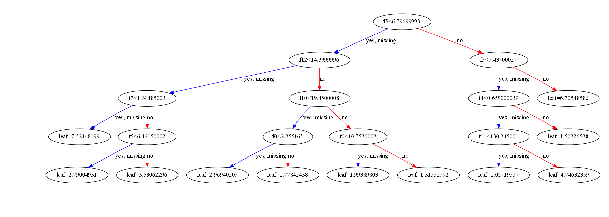

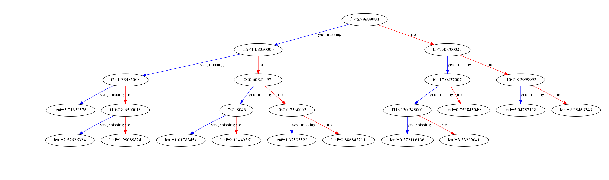

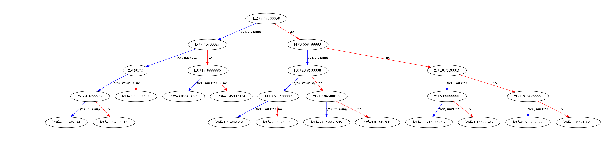

IndexError: list index out of range

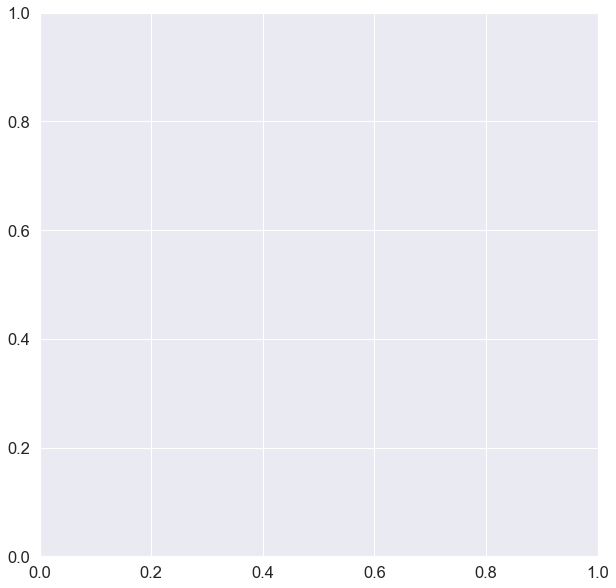

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10) #設定之後所有圖片大小
for i in range(0,10):
    xgb.plot_tree(xg_reg,num_trees=i)
    plt.show()

In [ ]:
# import xgboost as xgb

predict = xg_reg.predict(DM_train)
# 使用table 方式進行排序
df_sort = pd.DataFrame(X_train, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT'])
df_sort['MEDVprice'] = y_train
df_sort['predict'] = predict
df_sort = df_sort.sort_values(by='LSTAT', ascending= True)

df_sort

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVprice,predict
78,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,37.250309
18,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9,26.197659
15,0.08664,45.0,3.44,0.0,0.4370,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4,28.517616
347,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,26.197659
325,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0,37.250309
152,0.09604,40.0,6.41,0.0,0.4470,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98,32.0,26.197659
330,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0,37.250309
267,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3,37.250309
137,0.01538,90.0,3.75,0.0,0.3940,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11,44.0,37.250309
332,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,37.250309


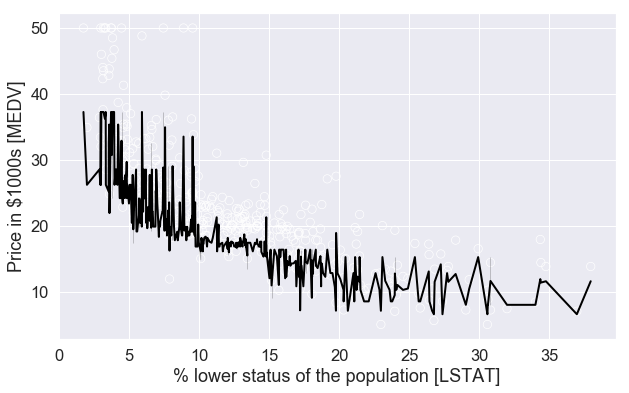

In [ ]:
#散布圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sort, x="LSTAT", y="MEDVprice", s=70, color='steelblue',edgecolor='white')
sns.lineplot(x='LSTAT', y='predict', data=df_sort , color='black', lw=2) 
# plt.scatter(X_test, y_test, c='g', edgecolor='white', s=70)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()
